# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd


# print(__version__)


** Import visualization libraries and set %matplotlib inline. **

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# from plotly import __version__
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import cufflinks as cf

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')


** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0] if ':' in x else None)

** What is the most common Reason for a 911 call based off of this new column? **

In [10]:
print(df['Reason'].value_counts())

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64


** Now use seaborn to create a countplot of 911 calls by Reason. **

C:\Users\RTX\AppData\Local\Temp\ipykernel_5576\2525999654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Reason', order=df['Reason'].value_counts().index, palette='viridis')


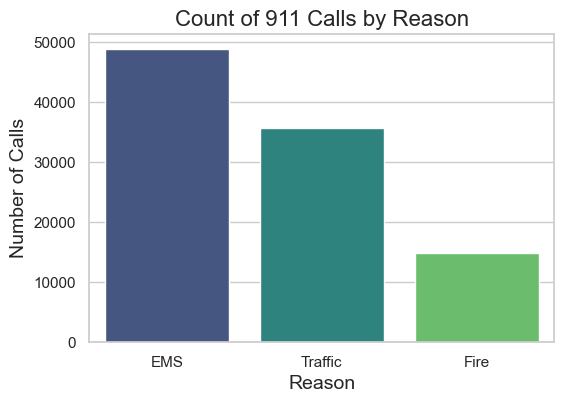

In [13]:

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='Reason', order=df['Reason'].value_counts().index, palette='viridis')

plt.title('Count of 911 Calls by Reason', fontsize=16)
plt.xlabel('Reason', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)

plt.show()


___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [14]:
print(df['timeStamp'].dtype)


object


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [15]:
pd.to_datetime(df['timeStamp'])

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
# Create a new column for Day of Week
df['Day of Week'] = df['timeStamp'].dt.day_name()

AttributeError: Can only use .dt accessor with datetimelike values

In [32]:
# Convert the 'timeStamp' column to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

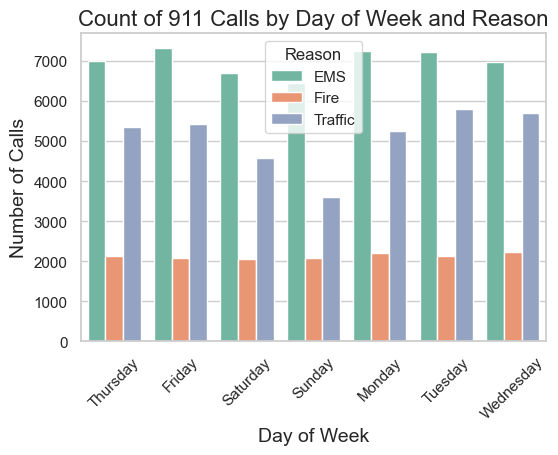

In [34]:
# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a countplot of the Day of Week with hue based on Reason
plt.figure(figsize=(6, 4))  # Set the size of the plot
sns.countplot(data=df, x='Day of Week', hue='Reason', palette='Set2')

# Add labels and title
plt.title('Count of 911 Calls by Day of Week and Reason', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)

# Show the plot
plt.legend(title='Reason')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


**Now do the same for Month:**

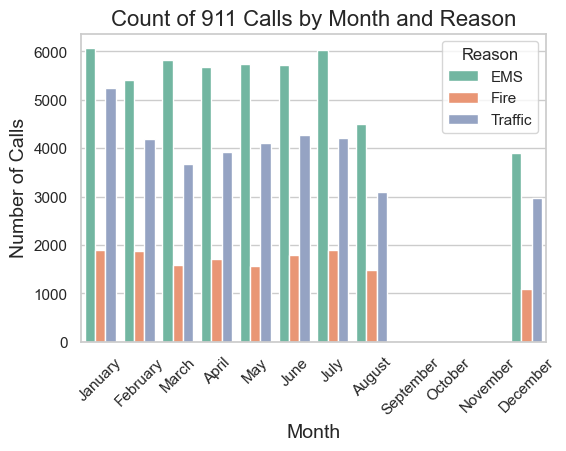

In [37]:

# Create a new column for Month
df['Month'] = df['timeStamp'].dt.month_name() 
# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a countplot of the Month with hue based on Reason
plt.figure(figsize=(6, 4))  # Set the size of the plot
sns.countplot(data=df, x='Month', hue='Reason', palette='Set2', order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Add labels and title
plt.title('Count of 911 Calls by Month and Reason', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)

# Show the plot
plt.legend(title='Reason')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [39]:
byMonth = df.groupby('Month').count()  # This counts all columns, you can specify one if needed
print (byMonth)

            lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                         
April     11326  11326  11326   9895  11326      11326  11323  11283  11326   
August     9078   9078   9078   7832   9078       9078   9073   9025   9078   
December   7969   7969   7969   6907   7969       7969   7963   7916   7969   
February  11467  11467  11467   9930  11467      11467  11465  11396  11467   
January   13205  13205  13205  11527  13205      13205  13203  13096  13205   
July      12137  12137  12137  10633  12137      12137  12133  12088  12137   
June      11786  11786  11786  10212  11786      11786  11777  11732  11786   
March     11101  11101  11101   9755  11101      11101  11092  11059  11101   
May       11423  11423  11423   9946  11423      11423  11420  11378  11423   

          Reason  Day of Week  
Month                          
April      11326        11326  
August      9078         9078  
De

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

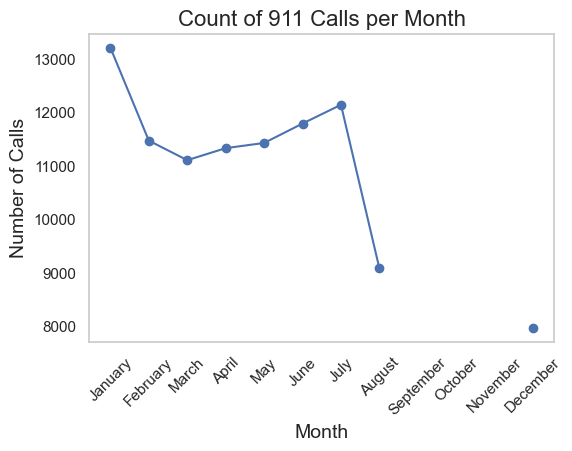

In [41]:

# Reindex to ensure all months are included in the plot
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
byMonth = byMonth.reindex(months_order)

# Create a simple line plot
plt.figure(figsize=(6, 4))  # Set the size of the plot
plt.plot(byMonth.index, byMonth['timeStamp'], marker='o')  # Plot the counts for each month

# Add labels and title
plt.title('Count of 911 Calls per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()  # Add gridlines for better readability
plt.show()


** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

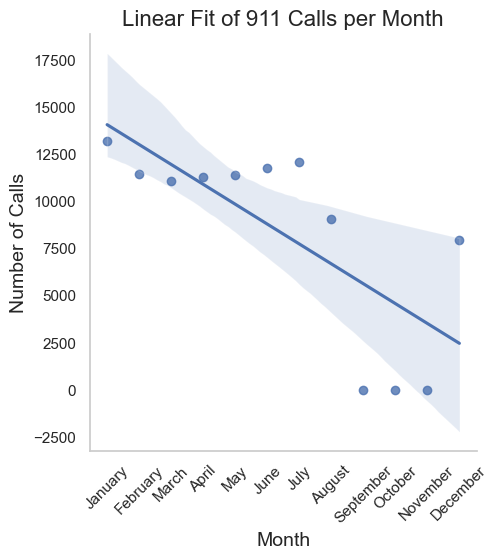

In [48]:


# Create a groupby object by month and count the number of calls
byMonth = df.groupby('Month')['timeStamp'].count().reset_index()

# Rename the columns for clarity
byMonth.columns = ['Month', 'CallCount']

# Reindex to ensure all months are included
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Create a DataFrame for all months with zero counts
all_months = pd.DataFrame(months_order, columns=['Month'])
# Merge with the byMonth DataFrame
byMonth = all_months.merge(byMonth, on='Month', how='left').fillna(0)

# Convert CallCount to integer
byMonth['CallCount'] = byMonth['CallCount'].astype(int)

# Create a numerical representation for the months
byMonth['MonthNum'] = range(1, 13)  # 1 for January, 2 for February, etc.

# Create the linear fit plot using Seaborn's lmplot
sns.lmplot(data=byMonth, x='MonthNum', y='CallCount', markers='o')

# Customize the plot
plt.title('Linear Fit of 911 Calls per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=months_order, rotation=45)  # Set month labels

# Show the plot
plt.grid()
plt.show()


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [49]:
df['timeStamp'].apply(lambda x: x.date())

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: timeStamp, Length: 99492, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

C:\Users\RTX\AppData\Local\Temp\ipykernel_7240\2387023872.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=call_counts_by_date, x='Date', y='CallCount', palette='viridis')


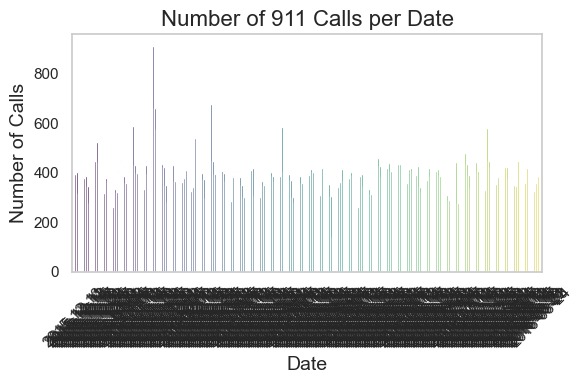

In [52]:
# Convert the 'timeStamp' column to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Create the 'Date' column by extracting the date from the 'timeStamp' column
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

# Group by 'Date' and count the number of calls
call_counts_by_date = df.groupby('Date').size().reset_index(name='CallCount')

# Create a plot of the counts of 911 calls per date
plt.figure(figsize=(6, 4))
sns.barplot(data=call_counts_by_date, x='Date', y='CallCount', palette='viridis')

# Customize the plot
plt.title('Number of 911 Calls per Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

C:\Users\RTX\AppData\Local\Temp\ipykernel_7240\2186911616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_data, x='Date', y='CallCount', palette='viridis')
C:\Users\RTX\AppData\Local\Temp\ipykernel_7240\2186911616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_data, x='Date', y='CallCount', palette='viridis')
C:\Users\RTX\AppData\Local\Temp\ipykernel_7240\2186911616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_data, x='Date', y='CallCount', palette='viridis')


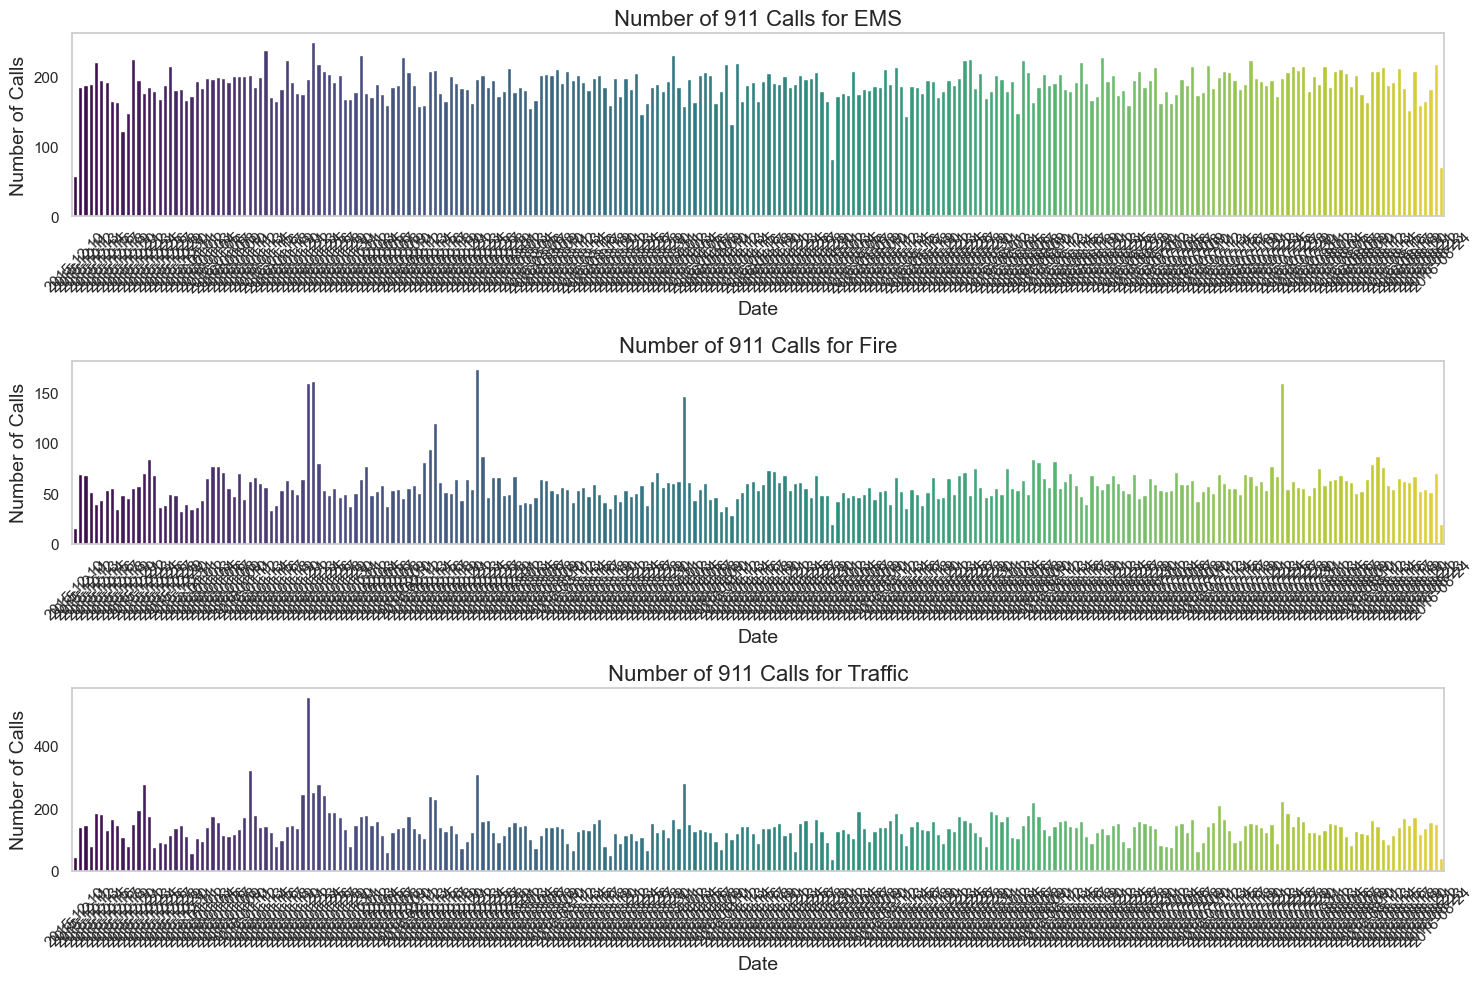

In [54]:


# Group by 'Date' and 'Reason' to count the number of calls
call_counts_by_reason = df.groupby(['Date', 'Reason']).size().reset_index(name='CallCount')

# Get unique reasons
unique_reasons = call_counts_by_reason['Reason'].unique()

# Create a figure for subplots
plt.figure(figsize=(15, 10))

# Create separate plots for each reason
for i, reason in enumerate(unique_reasons, start=1):
    plt.subplot(3, 1, i)  # Create a subplot for each reason
    reason_data = call_counts_by_reason[call_counts_by_reason['Reason'] == reason]
    sns.barplot(data=reason_data, x='Date', y='CallCount', palette='viridis')
    
    # Customize each subplot
    plt.title(f'Number of 911 Calls for {reason}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Calls', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.grid(axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


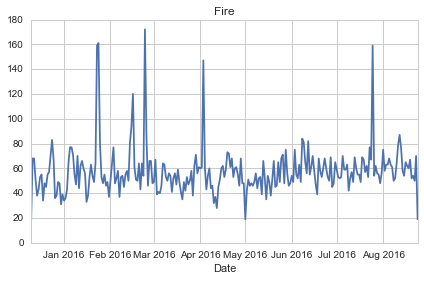

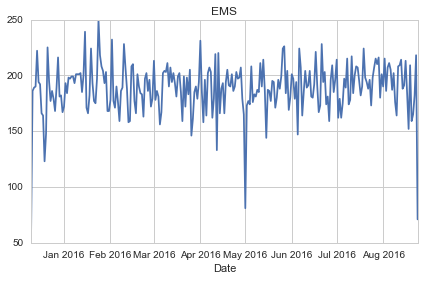

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

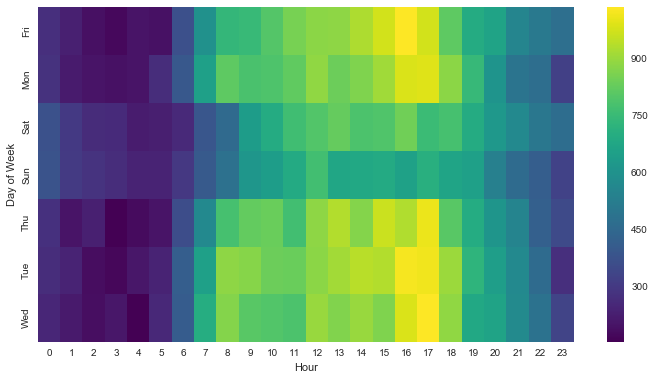

** Now create a clustermap using this DataFrame. **

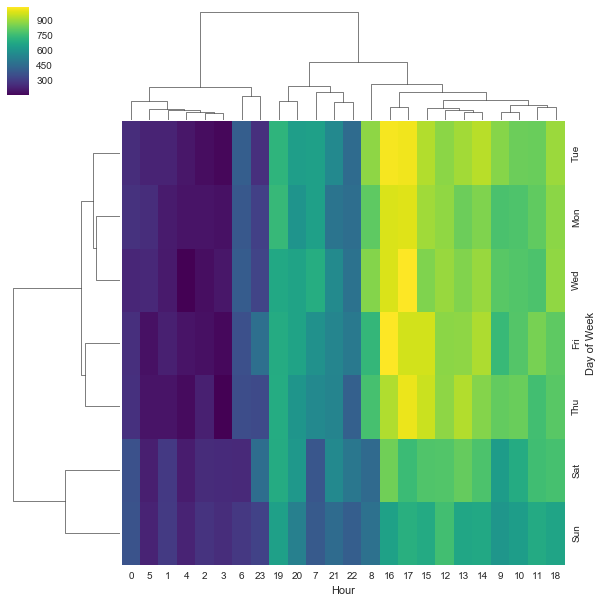

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


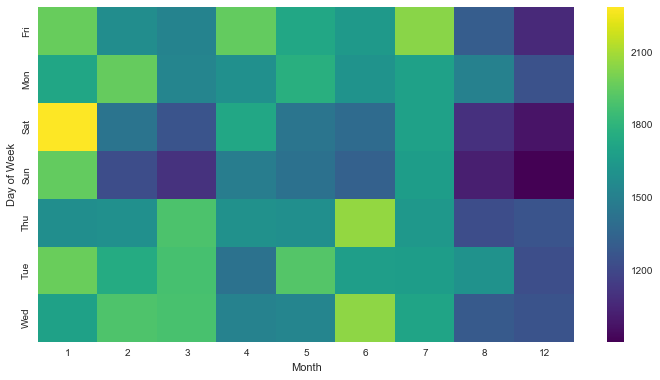

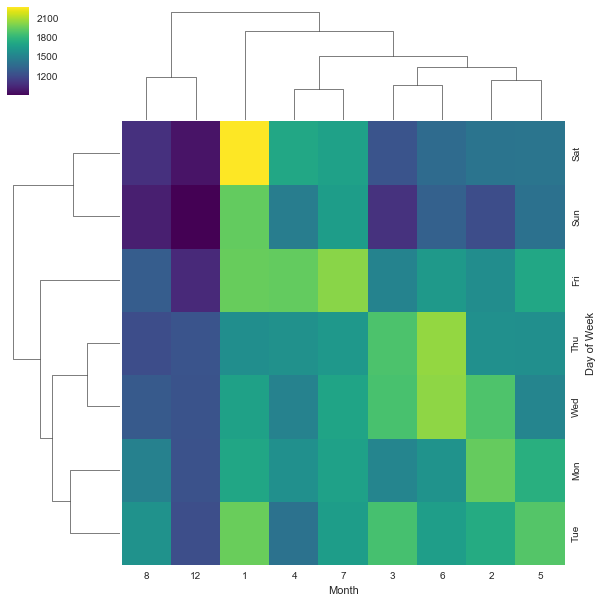

**Continue exploring the Data however you see fit!**
# Great Job!